In [2]:
#conda install requests

In [22]:
import requests

# Polygon

In [4]:
resp = requests.get("https://api.polygon.io/v1/open-close/AAPL/2022-09-30?adjusted=true&apiKey=Eknle1ag4NMz2nqHLzDD_pCzy9kkZdCQ")

In [12]:
print(resp.text)

{"status":"OK","from":"2022-09-30","symbol":"AAPL","open":141.28,"high":143.1,"low":138,"close":138.2,"volume":1.24910274e+08,"afterHours":137.52,"preMarket":143.59}


In [13]:
resp2 = requests.get("https://api.polygon.io/v1/open-close/AAPL/2022-10-01?adjusted=true&apiKey=Eknle1ag4NMz2nqHLzDD_pCzy9kkZdCQ")

In [14]:
print(resp.text)

{"status":"OK","from":"2022-09-30","symbol":"AAPL","open":141.28,"high":143.1,"low":138,"close":138.2,"volume":1.24910274e+08,"afterHours":137.52,"preMarket":143.59}


In [55]:
agg = requests.get("https://api.polygon.io/v2/aggs/ticker/AAPL/range/1/day/2022-09-22/2022-11-25?adjusted=true&sort=asc&limit=250&apiKey=Eknle1ag4NMz2nqHLzDD_pCzy9kkZdCQ")

In [58]:
agg.text[0:60]

'{"ticker":"AAPL","queryCount":46,"resultsCount":46,"adjusted'

In [59]:
days = agg.json()["results"]

In [60]:
days[0]

{'v': 86652542.0,
 'vw': 152.5709,
 'o': 152.38,
 'c': 152.74,
 'h': 154.47,
 'l': 150.91,
 't': 1663819200000,
 'n': 686879}

In [61]:
len(days)

46

In [64]:
x = [i for i in range(1, len(days) + 1)]
len(x)

46

In [66]:
new_arr = []
for i in days:
    new_arr.append(i['o'])


In [67]:
len(x)

46

In [68]:
len(new_arr)

46

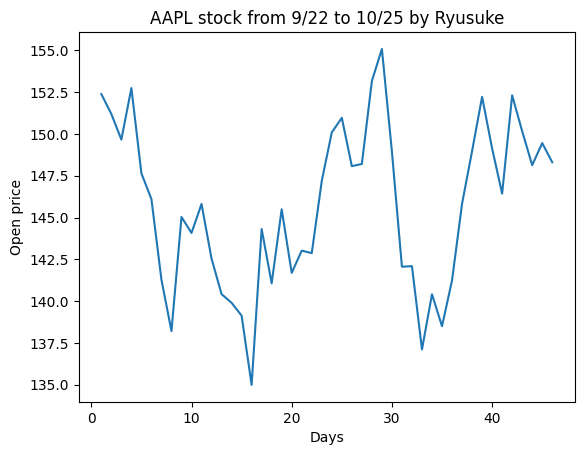

In [70]:
import matplotlib.pyplot as plt

plt.plot(x,new_arr)
plt.title('AAPL stock from 9/22 to 10/25 by Ryusuke')
plt.xlabel('Days')
plt.ylabel('Open price')
plt.show()

# Alphavantage

In [71]:
#automatically searches through news and classifies relavance and sentiment
resp2 = requests.get("https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers=AAPL&apikey=17P39YK2GJ553J0Q")

In [81]:
print(resp2.text[0:300])

{
    "items": "50",
    "sentiment_score_definition": "x <= -0.35: Bearish; -0.35 < x <= -0.15: Somewhat-Bearish; -0.15 < x < 0.15: Neutral; 0.15 <= x < 0.35: Somewhat_Bullish; x >= 0.35: Bullish",
    "relevance_score_definition": "0 < x <= 1, with a higher score indicating higher relevance.",
   


In [82]:
resp3 = requests.get("https://financialmodelingprep.com/api/v3/stock_market/gainers?apikey=37fe2a7ee9f6099cf3a062fae59990bd")

In [83]:
print(len(resp3.text))

3984


In [88]:
gainers = resp3.json()
gainers[0:2]

[{'symbol': 'XPEV',
  'name': 'XPeng Inc.',
  'change': 3.47,
  'price': 10.81,
  'changesPercentage': 47.275208},
 {'symbol': 'BDSX',
  'name': 'Biodesix, Inc.',
  'change': 0.64,
  'price': 2.0,
  'changesPercentage': 47.058823}]

In [85]:
resp4 = requests.get("https://financialmodelingprep.com/api/v3/stock_market/losers?apikey=37fe2a7ee9f6099cf3a062fae59990bd")

In [89]:
losers = resp4.json()
losers[0:2]

[{'symbol': 'ONCS',
  'name': 'OncoSec Medical Incorporated',
  'change': -1.02,
  'price': 2.83,
  'changesPercentage': -26.493507},
 {'symbol': 'CNSP',
  'name': 'CNS Pharmaceuticals, Inc.',
  'change': -1.02,
  'price': 3.03,
  'changesPercentage': -25.185188}]

In [90]:
stockset = {}
default_big = ['MSFT', 'AAPL', 'WMT', 'TSLA', 'AMZN', 'DIS', 'PFE']    

In [91]:
tengainers = gainers[:10]
for s in tengainers:
    mc = requests.get("https://financialmodelingprep.com/api/v3/market-capitalization/" + str(s['symbol']) + "?apikey=37fe2a7ee9f6099cf3a062fae59990bd")
    mcap = mc.json()
    print(mcap)
    print(mcap[0]['marketCap'])
    stockset[str(s['symbol'])] = int(mcap[0]['marketCap'])

[{'symbol': 'XPEV', 'date': '2022-11-29', 'marketCap': 6365149696}]
6365149696
[{'symbol': 'BDSX', 'date': '2022-11-30', 'marketCap': 54721548}]
54721548
[{'symbol': 'TOPS', 'date': '2022-11-29', 'marketCap': 10173891}]
10173891
[{'symbol': 'BCAN', 'date': '2022-11-30', 'marketCap': 124265752}]
124265752
[{'symbol': 'CGTX', 'date': '2022-11-30', 'marketCap': 37155048}]
37155048
[{'symbol': 'HZNP', 'date': '2022-11-29', 'marketCap': 17848709300}]
17848709300
[{'symbol': 'TITN', 'date': '2022-11-29', 'marketCap': 778366912}]
778366912
[{'symbol': 'RADI', 'date': '2022-11-29', 'marketCap': 962364400}]
962364400
[{'symbol': 'TERN', 'date': '2022-11-29', 'marketCap': 204619072}]
204619072
[{'symbol': 'UXIN', 'date': '2022-11-29', 'marketCap': 122431784}]
122431784


In [151]:
test_j = requests.get("https://financialmodelingprep.com/api/v3/market-capitalization/" + 'CHKEW' + "?apikey=37fe2a7ee9f6099cf3a062fae59990bd")
test_j = test_j.json()
    

In [152]:
test_j

[{'symbol': 'CHKEW', 'date': '2022-11-29', 'marketCap': 0.0}]

In [130]:
tenlosers = losers[:10]
for s in tenlosers:
    mc = requests.get("https://financialmodelingprep.com/api/v3/market-capitalization/" + str(s['symbol']) + "?apikey=37fe2a7ee9f6099cf3a062fae59990bd")
    mcap = mc.json()
    stockset[s['symbol']] = int(mcap[0]['marketCap'])

In [131]:
print(stockset)

{'XPEV': 6365149696, 'BDSX': 54721548, 'TOPS': 10173891, 'BCAN': 124265752, 'CGTX': 37155048, 'HZNP': 17848709300, 'TITN': 778366912, 'RADI': 962364400, 'TERN': 204619072, 'UXIN': 122431784, 'ONCS': 6894200, 'CNSP': 8286727, 'DBGI': 3574222, 'XFOR': 124623184, 'KNOP': 476471400, 'CANG': 353781888, 'CRWD': 31637127168, 'SLDP': 819293184, 'LXEH': 36668180, 'CHKEW': 0, 'MSFT': 1791533520100, 'AAPL': 2354557747200, 'WMT': 410257358848, 'TSLA': 530091474944, 'AMZN': 943249227776, 'DIS': 168607270000, 'PFE': 277802934600}


In [94]:
for d in default_big:
    mc = requests.get("https://financialmodelingprep.com/api/v3/market-capitalization/" + str(d) + "?apikey=37fe2a7ee9f6099cf3a062fae59990bd")
    mcap = mc.json()
    print(mcap[0]['marketCap'])
    stockset[d] = int(mcap[0]['marketCap'])

1791533520100
2354557747200
410257358848
530091474944
943249227776
168607270000
277802934600


In [132]:
final = dict(reversed(sorted(stockset.items(), key=lambda item: item[1])))

In [133]:
print(final)

{'AAPL': 2354557747200, 'MSFT': 1791533520100, 'AMZN': 943249227776, 'TSLA': 530091474944, 'WMT': 410257358848, 'PFE': 277802934600, 'DIS': 168607270000, 'CRWD': 31637127168, 'HZNP': 17848709300, 'XPEV': 6365149696, 'RADI': 962364400, 'SLDP': 819293184, 'TITN': 778366912, 'KNOP': 476471400, 'CANG': 353781888, 'TERN': 204619072, 'XFOR': 124623184, 'BCAN': 124265752, 'UXIN': 122431784, 'BDSX': 54721548, 'CGTX': 37155048, 'LXEH': 36668180, 'TOPS': 10173891, 'CNSP': 8286727, 'ONCS': 6894200, 'DBGI': 3574222, 'CHKEW': 0}


In [134]:
import pandas as pd 

stocks = pd.DataFrame([final]).T.rename({0: 'market'}, axis = 1)

In [126]:
stocks

,market
AAPL,2354557747200
MSFT,1791533520100
AMZN,943249227776
TSLA,530091474944
WMT,410257358848
PFE,277802934600
DIS,168607270000
CRWD,31637127168
HZNP,17848709300
XPEV,6365149696


In [ ]:
#first 9 are high, next 9 mid, next 9 low market cap